In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
from PIL import Image


In [2]:
# Set parameters
batch_size = 32
img_height, img_width = 150, 150

# Define paths
train_dir = 'train'
val_dir = 'validate'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data for validation
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training and validation images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


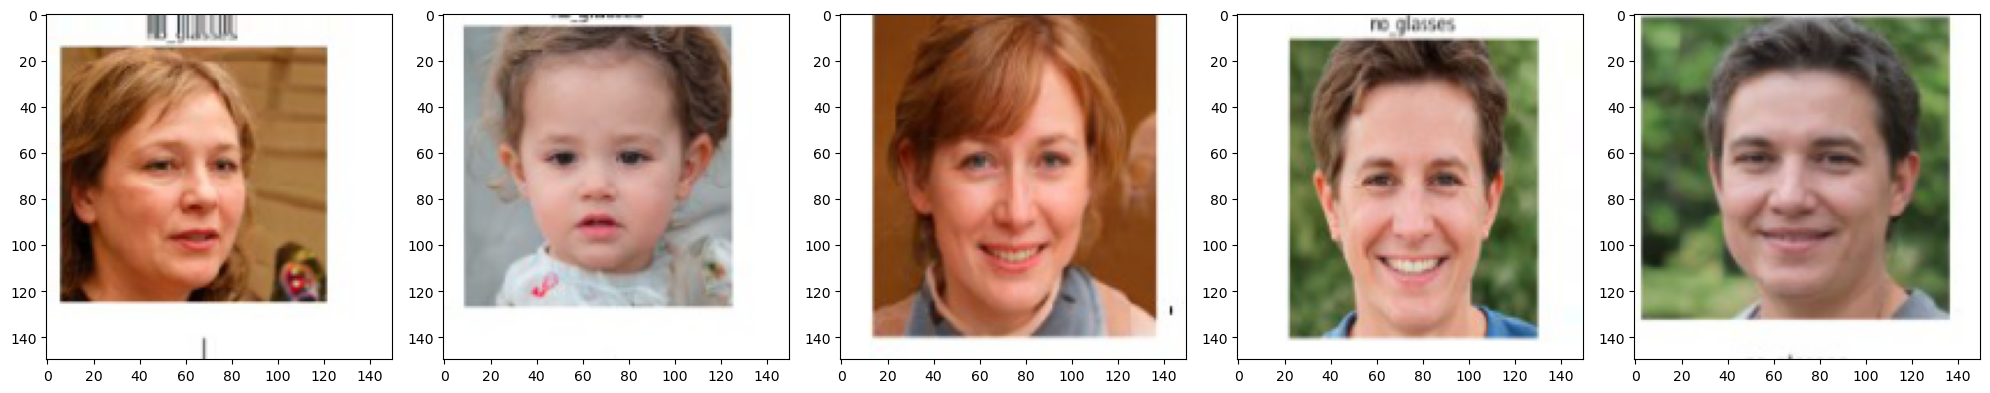

In [3]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Get a batch of images
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    #callbacks=[early_stop],
    epochs=38
    
)


Epoch 1/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 865ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 2/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 3/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 4/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 7/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 3.4833e-04
Epoch 8/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.9500 - loss: 0.0825 - val_accuracy: 1.0000 - val_l

In [49]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9500 - loss: 0.1211
Validation Accuracy: 95.00%


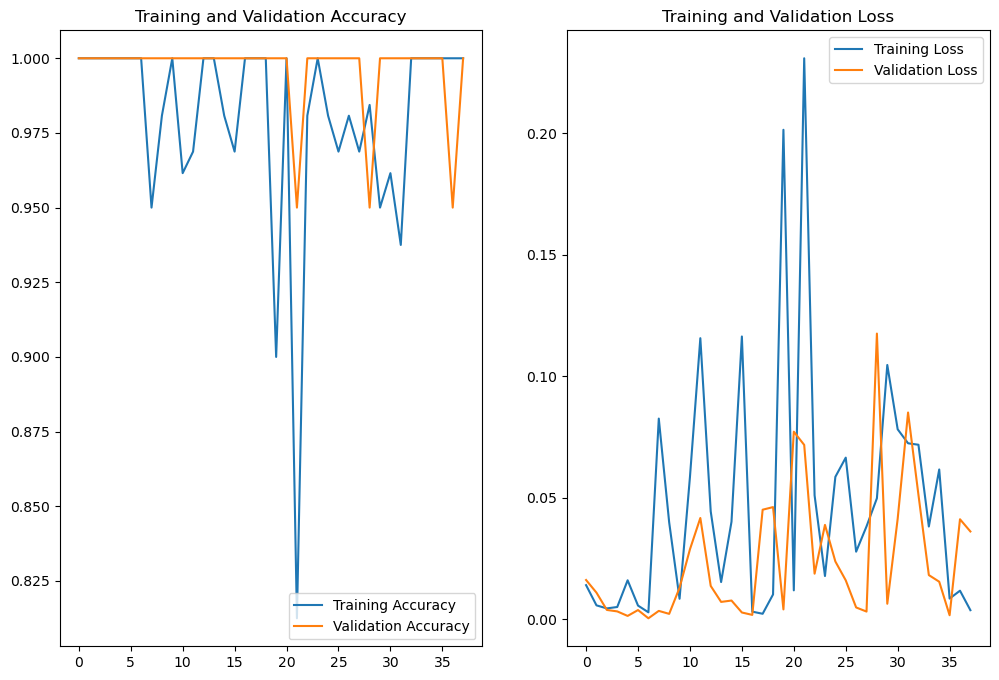

In [50]:
# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.round(Y_pred).astype(int).flatten()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [52]:
print('Classification Report')
target_names = ['No Glasses', 'Glasses']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  No Glasses       0.60      0.60      0.60        10
     Glasses       0.60      0.60      0.60        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



{'glasses': 0, 'noglasses': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw prediction output: [0.9988227]
Prediction: No Glasses


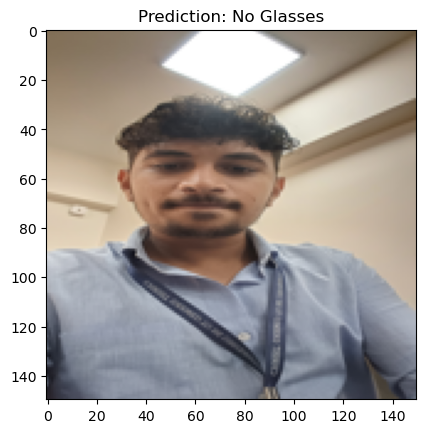

In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming model is already defined and trained

# Check class indices
print(train_generator.class_indices)  # Should output {'glasses': 0, 'noglasses': 1} or similar

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the test image
test_img_path = 'test/tushar.jpg'
test_img = load_and_preprocess_image(test_img_path)

# Make prediction
prediction = model.predict(test_img)

# Interpret the prediction
print("Raw prediction output:", prediction[0])
predicted_class = 'Glasses' if prediction[0] < 0.5 else 'No Glasses'
print(f'Prediction: {predicted_class}')

# Visualize the test image
plt.imshow(test_img[0])
plt.title(f'Prediction: {predicted_class}')
plt.show()


{'glasses': 0, 'noglasses': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw prediction output: [1.3748448e-14]
Prediction: Glasses


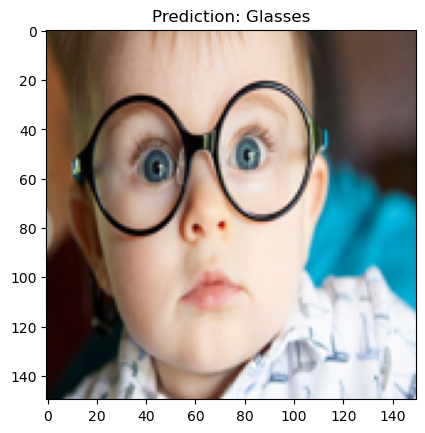

In [95]:
# Check class indices
print(train_generator.class_indices)  # Should output {'glasses': 0, 'noglasses': 1} or similar

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the test image
test_img_path = 'test/main-qimg-74dfbddb0804988c9a98bc3bd73a1a77-lq.jpeg'
test_img = load_and_preprocess_image(test_img_path)

# Make prediction
prediction = model.predict(test_img)

# Interpret the prediction
print("Raw prediction output:", prediction[0])
predicted_class = 'Glasses' if prediction[0] < 0.5 else 'No Glasses'
print(f'Prediction: {predicted_class}')

# Visualize the test image
plt.imshow(test_img[0])
plt.title(f'Prediction: {predicted_class}')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Raw prediction output: [0.75573134]
Prediction: No Glasses


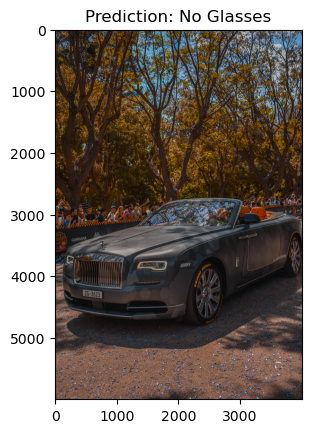

In [125]:
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the test directory
test_dir = 'test'

# List all files in the test directory
all_files = os.listdir(test_dir)

# Randomly select a file
random_file = random.choice(all_files)
test_img_path = os.path.join(test_dir, random_file)

# Load and preprocess the randomly selected image
test_img = load_and_preprocess_image(test_img_path)

# Make prediction
prediction = model.predict(test_img)

# Interpret the prediction
print("Raw prediction output:", prediction[0])
predicted_class = 'Glasses' if prediction[0] < 0.5 else 'No Glasses'
print(f'Prediction: {predicted_class}')

# Visualize the test image
img = Image.open(test_img_path)
plt.imshow(img)
plt.title(f'Prediction: {predicted_class}')
plt.show()